# Twitter y el uso de su API

Este proyecto pretende consolidar los conocimientos adquiridos sobre la extracción de datos mediante API, además de analizar e interactuar con la API de streaming de Twitter.

Dado la reciente adquisición de Twitter por parte de Elon Musk, y su posterior transformación a X, las políticas de la API de Twitter requieren de un coste y ya no son de acceso gratuit. Dicho lo cual, los ejemplos y el proceso de analisis de datos on-stream no será realmente on-stream, sinó que simularemos el acceso en tiempo real a la información. 

Empezamos con lo básico, importamos los paquetes de las funciones que utilizaremos:


In [55]:
import tweepy # Libreria de funciones que nos fácilitaria la interacción con la API de Twitter
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Definimos una función que utilizaremos para el recuento de palabras específicas dentro de tweets:

In [41]:
def word_in_text(word, text):

    word = word.lower()

    text = text.lower()

    match = re.search(word, text)


    if match:

        return True

    return False

Generamos las llaves de acceso para la API de Twitter:

- `consumer_key` y `consumer_secret` → identifican la aplicación.
- `access_token` y `access_token_secret` → identifican al usuario que ejecuta la app.

In [10]:
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"

Ahora vamos a generar un objeto `Stream` que nos permita abrir una conexión en tiempo real con los servidores de Twitter. Dado el cambio de policitas ya comentado, el acceso a los datos se dará con una pequeña muestra representativa y utilizando una versión de la API en desuso:

1) Primero, preparamos una interfaz de coneixón para que nuestro script se pueda conectar a los *endpoints* de streaming de Twitter:

In [11]:
# stream = tweepy.Stream(consumer_key, consumer_secret, access_token, access_token_secret)


2. Ahora que ya estamos conectados a los *endpoints* de Twitter, estamos listos para empezar a recibir flujos de datos. Para poder hacerlo, solo necesitamos aplicar filtros a la información que recibamos, así podremos cribar entre los millones de tweets que se están subiendo al momento:

In [13]:
# stream.filter(track=['clinton','trump','sanders','cruz'])

3. Los falsos datos on-stream los almacenamos en el documento JSON `on-stream_data.json`. Aquí hay una pequeña muestra de su contenido:


```python
{
    "in_reply_to_user_id": null,
    "created_at": "Tue Mar 29 23:40:17 +0000 2016",
    "filter_level": "low",
    "truncated": false,
    "possibly_sensitive": false,
    "timestamp_ms": "1459294817758",
    "user": {
        "profile_banner_url": "https://pbs.twimg.com/profile_banners/2290155049/1456586630",
        "created_at": "Mon Jan 13 20:05:32 +0000 2014",

        ...
```

Ya tenemos los datos, es hora de procesarlos y recoger la información que nos interesa:

In [71]:
tweets_data = []

#Abrimos el documento con el falso contenido on-stream:
with open('on-stream_data.json', 'r', encoding='utf-8') as tweets_file:
    
    #Carga todo el array JSON en una lista de Python para poderlo manipular:
    tweets_data = json.load(tweets_file)


#Generamos un DataFrame con la infromación recogida:
df_tweets = pd.DataFrame(tweets_data, columns=['text','lang'])

df_tweets.head()

,text,lang
0,RT @bpolitics: .@krollbondrating's Christopher...,en
1,RT @HeidiAlpine: @dmartosko Cruz video found.....,en
2,Njihuni me Zonjën Trump !!! | Ekskluzive https...,NaN
3,Stop asking Bernie supporters if they’ll vote ...,en
4,RT @bpolitics: .@krollbondrating's Christopher...,en


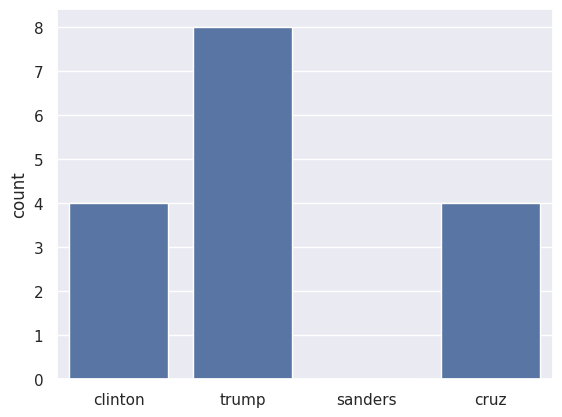

In [72]:
#Inicializamos la lista donde almacenaremos todo el recuento
# de concurrencias de los nombres que hemos utilizado para filtrar el objecto stream:
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

#Analizamso el DataFrame para actualizar la lista de concurrencias utilizando la función personalizada:
for index, row in df_tweets.iterrows():

    clinton += word_in_text('clinton',row['text'])

    trump += word_in_text('trump',row['text'])

    sanders += word_in_text('sanders',row['text'])

    cruz += word_in_text('cruz',row['text'])

#Configuramos la apariencia de Seaborn:
sns.set(color_codes=True)

#Creamos la lista de etiquetas que aparecerán en el gráfico:
label_names = ['clinton','trump','sanders','cruz']

#Mostramos el gráfico:
ax = sns.barplot(x=label_names,y=[clinton, trump, sanders, cruz])

ax.set(ylabel='count')
plt.show()